# Training Neural Networks with Keras

### Goals: 
- Intro: train a neural network with `tensorflow` and the Keras layers

### Dataset:
- Digits: 10 class handwritten digits
- http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()

In [2]:
digits.images.shape

(1797, 8, 8)

In [3]:
digits.data.shape

(1797, 64)

In [4]:
digits.target.shape

(1797,)

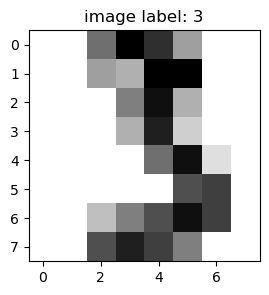

In [5]:
sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[sample_index], cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.title("image label: %d" % digits.target[sample_index]);

## Train / Test Split

Let's keep some held-out data to be able to measure the generalization performance of our model.

In [6]:
from sklearn.model_selection import train_test_split


data = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='int32')

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.15, random_state=37)

In [7]:
X_train.shape

(1527, 64)

In [8]:
X_test.shape

(270, 64)

In [9]:
y_train.shape

(1527,)

In [10]:
y_test.shape

(270,)

## Preprocessing of the Input Data


Make sure that all input variables are approximately on the same scale via input normalization:

In [11]:
from sklearn import preprocessing


# mean = 0 ; standard deviation = 1.0
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# print(scaler.mean_)
# print(scaler.scale_)

In [12]:
X_train.shape

(1527, 64)

In [13]:
X_train.mean(axis=0)

array([ 0.00000000e+00,  1.82717315e-07,  1.44815475e-08, -3.13441575e-08,
       -7.49449391e-09, -9.50473567e-09, -7.10805850e-08,  6.18783673e-08,
       -3.06025143e-08,  1.31056055e-07,  3.27103429e-08, -3.59111163e-09,
       -4.29372049e-09, -1.07733342e-08, -1.92827070e-08, -7.90239696e-08,
        1.56408518e-07, -2.18589391e-09,  2.89630950e-08, -1.74090840e-08,
        6.71381741e-08,  5.87068669e-08, -9.85213617e-08, -4.79598782e-07,
       -2.98413561e-08, -4.19223234e-08, -1.82522143e-07,  1.79555570e-08,
       -3.11294706e-08,  2.08440607e-08, -6.83091841e-08,  9.33420665e-07,
        0.00000000e+00,  1.78774897e-08,  1.50670544e-07, -3.45839659e-08,
       -1.02463780e-08, -3.66137236e-08, -5.67551766e-08,  0.00000000e+00,
       -2.17120757e-07, -6.30981702e-08, -1.81116935e-08, -2.62307278e-08,
       -7.95509294e-08, -1.95169103e-09, -8.23613622e-09,  4.77871538e-08,
       -1.66303593e-07, -1.25688899e-07, -2.30299548e-08, -1.13198082e-08,
        2.51387576e-07, -

In [14]:
X_train.std(axis=0)

array([0.        , 0.99999774, 0.9999994 , 1.0000005 , 0.9999989 ,
       0.9999988 , 1.0000077 , 0.9999965 , 1.0000098 , 0.9999947 ,
       1.0000007 , 0.9999992 , 0.9999999 , 0.99999684, 0.9999984 ,
       0.99999887, 0.9999969 , 1.000001  , 1.0000002 , 1.0000025 ,
       0.99999905, 1.000004  , 1.0000008 , 0.9999972 , 0.9999967 ,
       0.99999726, 1.        , 1.0000007 , 1.0000029 , 0.9999996 ,
       0.99999696, 1.0000001 , 0.        , 1.0000007 , 1.0000023 ,
       0.9999993 , 0.9999994 , 0.9999997 , 0.9999955 , 0.        ,
       0.9999891 , 0.99999785, 1.0000032 , 0.9999999 , 0.99999756,
       1.000001  , 0.999996  , 0.9999987 , 1.0000006 , 0.9999936 ,
       1.0000038 , 1.0000004 , 1.0000012 , 0.999997  , 0.99999785,
       0.9999988 , 0.9999857 , 1.0000073 , 0.9999967 , 1.0000031 ,
       0.9999993 , 1.        , 0.999996  , 0.9999977 ], dtype=float32)

Let's display the one of the transformed sample (after feature standardization):

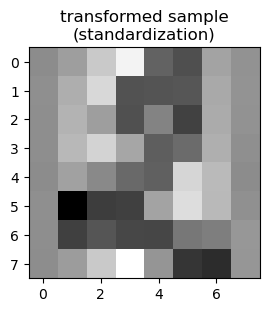

In [16]:
# pour les modèles de DL c'est mieux de StandardScale

sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(X_train[sample_index].reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("transformed sample\n(standardization)");

The scaler objects makes it possible to recover the original sample:

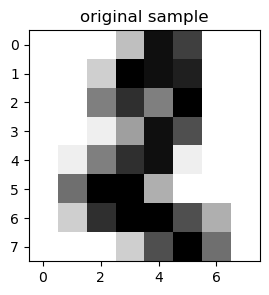

In [20]:
# appliquer a la transformation et pas a l'image initial

plt.figure(figsize=(3, 3))
plt.imshow(scaler.inverse_transform(X_train[sample_index:sample_index+1]).reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("original sample");

In [21]:
print(X_train.shape, y_train.shape)

(1527, 64) (1527,)


In [22]:
print(X_test.shape, y_test.shape)

(270, 64) (270,)


## Preprocessing of the Target Data


To train a first neural network we also need to turn the target variable into a vector "one-hot-encoding" representation. Here are the labels of the first samples in the training set encoded as integers:

In [23]:
y_train[:3]

array([2, 9, 5], dtype=int32)

Keras provides a utility function to convert integer-encoded categorical variables as one-hot encoded values:

In [26]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train)
Y_train[:3]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [27]:
Y_train.shape

(1527, 10)

## Feed Forward Neural Networks with Keras

Objectives of this section:

- Build and train a first feedforward network using `Keras`
    - https://www.tensorflow.org/guide/keras/overview
- Experiment with different optimizers, activations, size of layers, initializations

### A First Keras Model

We can now build an train a our first feed forward neural network using the high level API from keras:

- first we define the model by stacking layers with the right dimensions
- then we define a loss function and plug the SGD optimizer
- then we feed the model the training data for fixed number of epochs

In [32]:
# EPOCH, nombre de fois qu'on parcours le jeu de données. On split en batch, et on refait avec l'ensemble de batch. 
# 1 epoch, on a fini les batch et on recommence jusqu'a 15
# batch fixé par mémoire et par convergence 
# validation split -> pour les metriques

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

input_dim = X_train.shape[1]
hidden_dim = 100
output_dim = Y_train.shape[1]

model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
model.add(Dense(output_dim, activation="softmax"))

model.compile(optimizer=optimizers.SGD(learning_rate=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=15, batch_size=32)

Epoch 1/15
39/39 [==============================] - 0s 4ms/step - loss: 0.9609 - accuracy: 0.7469 - val_loss: 0.4409 - val_accuracy: 0.9020
Epoch 2/15
39/39 [==============================] - 0s 2ms/step - loss: 0.3160 - accuracy: 0.9402 - val_loss: 0.2797 - val_accuracy: 0.9281
Epoch 3/15
39/39 [==============================] - 0s 2ms/step - loss: 0.2116 - accuracy: 0.9631 - val_loss: 0.2244 - val_accuracy: 0.9477
Epoch 4/15
39/39 [==============================] - 0s 2ms/step - loss: 0.1650 - accuracy: 0.9713 - val_loss: 0.1912 - val_accuracy: 0.9641
Epoch 5/15
39/39 [==============================] - 0s 2ms/step - loss: 0.1361 - accuracy: 0.9762 - val_loss: 0.1764 - val_accuracy: 0.9641
Epoch 6/15
39/39 [==============================] - 0s 2ms/step - loss: 0.1166 - accuracy: 0.9795 - val_loss: 0.1578 - val_accuracy: 0.9641
Epoch 7/15
39/39 [==============================] - 0s 1ms/step - loss: 0.1023 - accuracy: 0.9812 - val_loss: 0.1468 - val_accuracy: 0.9706
Epoch 8/15
39/39 [==

### Visualizing the Convergence

Let's wrap the keras history info into a pandas dataframe for easier plotting:

In [33]:
import pandas as pd

history_df = pd.DataFrame(history.history)
history_df["epoch"] = history.epoch

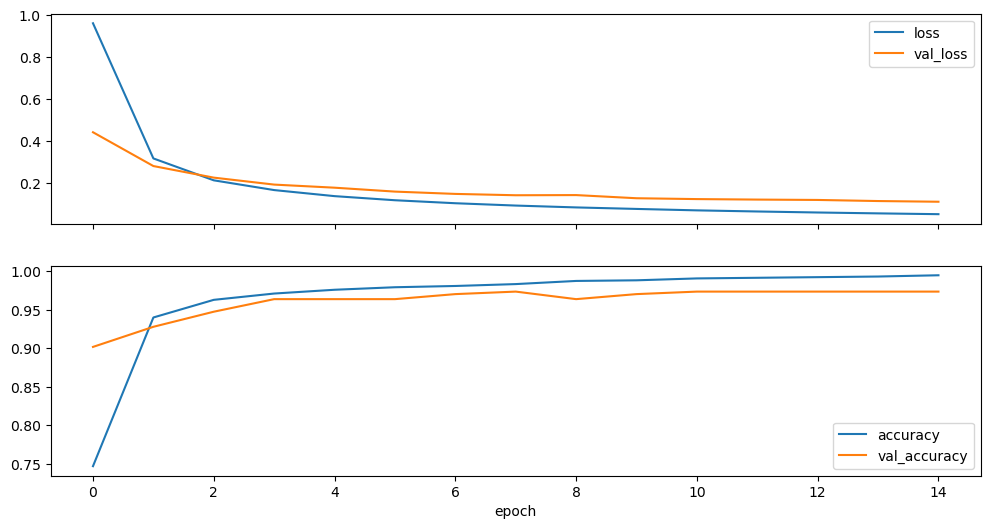

In [34]:
# ici c'est nous qui regardons la convergence et on l'arrete, et ça prend du temps, 
# donc si on met 100 epochs alors que a 3 il converge ça sert a rien.

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
history_df.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
history_df.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1);

### Monitoring Convergence with Tensorboard

Tensorboard is a built-in neural network monitoring tool. 

In [35]:
%load_ext tensorboard

In [36]:
!rm -rf tensorboard_logs

In [37]:
import datetime
from tensorflow.keras.callbacks import TensorBoard

model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
model.add(Dense(output_dim, activation="softmax"))

model.compile(optimizer=optimizers.SGD(learning_rate=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

timestamp =  datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "tensorboard_logs/" + timestamp
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=X_train, y=Y_train, validation_split=0.2, epochs=15,
          callbacks=[tensorboard_callback]);

Epoch 1/15
39/39 [==============================] - 0s 6ms/step - loss: 0.9189 - accuracy: 0.7658 - val_loss: 0.4011 - val_accuracy: 0.9183
Epoch 2/15
39/39 [==============================] - 0s 2ms/step - loss: 0.3211 - accuracy: 0.9369 - val_loss: 0.2648 - val_accuracy: 0.9542
Epoch 3/15
39/39 [==============================] - 0s 2ms/step - loss: 0.2175 - accuracy: 0.9550 - val_loss: 0.2087 - val_accuracy: 0.9608
Epoch 4/15
39/39 [==============================] - 0s 2ms/step - loss: 0.1692 - accuracy: 0.9697 - val_loss: 0.1736 - val_accuracy: 0.9673
Epoch 5/15
39/39 [==============================] - 0s 2ms/step - loss: 0.1397 - accuracy: 0.9779 - val_loss: 0.1535 - val_accuracy: 0.9673
Epoch 6/15
39/39 [==============================] - 0s 2ms/step - loss: 0.1199 - accuracy: 0.9803 - val_loss: 0.1413 - val_accuracy: 0.9706
Epoch 7/15
39/39 [==============================] - 0s 2ms/step - loss: 0.1058 - accuracy: 0.9869 - val_loss: 0.1335 - val_accuracy: 0.9673
Epoch 8/15
39/39 [==

In [38]:
%tensorboard --logdir tensorboard_logs

### b) Exercises: Impact of the Optimizer

- Try to decrease the learning rate value by 10 or 100. What do you observe?

- Try to increase the learning rate value to make the optimization diverge.

- Configure the SGD optimizer to enable a Nesterov momentum of 0.9
  
**Notes**: 

The keras API documentation is available at:

https://www.tensorflow.org/api_docs/python/tf/keras

It is also possible to learn more about the parameters of a class by using the question mark: type and evaluate:

```python
optimizers.SGD?
```

in a jupyter notebook cell.

It is also possible to type the beginning of a function call / constructor and type "shift-tab" after the opening paren:

```python
optimizers.SGD(<shiff-tab>
```

In [42]:
optimizers.SGD?

Init signature:
optimizers.SGD(
    learning_rate=0.01,
    momentum=0.0,
    nesterov=False,
    name='SGD',
    **kwargs,
)
Docstring:     
Gradient descent (with momentum) optimizer.

Update rule for parameter `w` with gradient `g` when `momentum` is 0:

```python
w = w - learning_rate * g
```

Update rule when `momentum` is larger than 0:

```python
velocity = momentum * velocity - learning_rate * g
w = w + velocity
```

When `nesterov=True`, this rule becomes:

```python
velocity = momentum * velocity - learning_rate * g
w = w + momentum * velocity - learning_rate * g
```

Args:
  learning_rate: A `Tensor`, floating point value, or a schedule that is a
    `tf.keras.optimizers.schedules.LearningRateSchedule`, or a callable
    that takes no arguments and returns the actual value to use. The
    learning rate. Defaults to 0.01.
  momentum: float hyperparameter >= 0 that accelerates gradient descent in
    the relevant direction and dampens oscillations. Defaults to 0, i.e.,
    van

Epoch 1/15
39/39 [==============================] - 0s 5ms/step - loss: 0.9114 - accuracy: 0.7625 - val_loss: 0.3924 - val_accuracy: 0.9150
Epoch 2/15
39/39 [==============================] - 0s 2ms/step - loss: 0.3126 - accuracy: 0.9320 - val_loss: 0.2663 - val_accuracy: 0.9510
Epoch 3/15
39/39 [==============================] - 0s 2ms/step - loss: 0.2145 - accuracy: 0.9533 - val_loss: 0.2109 - val_accuracy: 0.9641
Epoch 4/15
39/39 [==============================] - 0s 2ms/step - loss: 0.1674 - accuracy: 0.9623 - val_loss: 0.1787 - val_accuracy: 0.9673
Epoch 5/15
39/39 [==============================] - 0s 2ms/step - loss: 0.1402 - accuracy: 0.9730 - val_loss: 0.1613 - val_accuracy: 0.9706
Epoch 6/15
39/39 [==============================] - 0s 2ms/step - loss: 0.1203 - accuracy: 0.9779 - val_loss: 0.1515 - val_accuracy: 0.9673
Epoch 7/15
39/39 [==============================] - 0s 2ms/step - loss: 0.1058 - accuracy: 0.9812 - val_loss: 0.1412 - val_accuracy: 0.9673
Epoch 8/15
39/39 [==

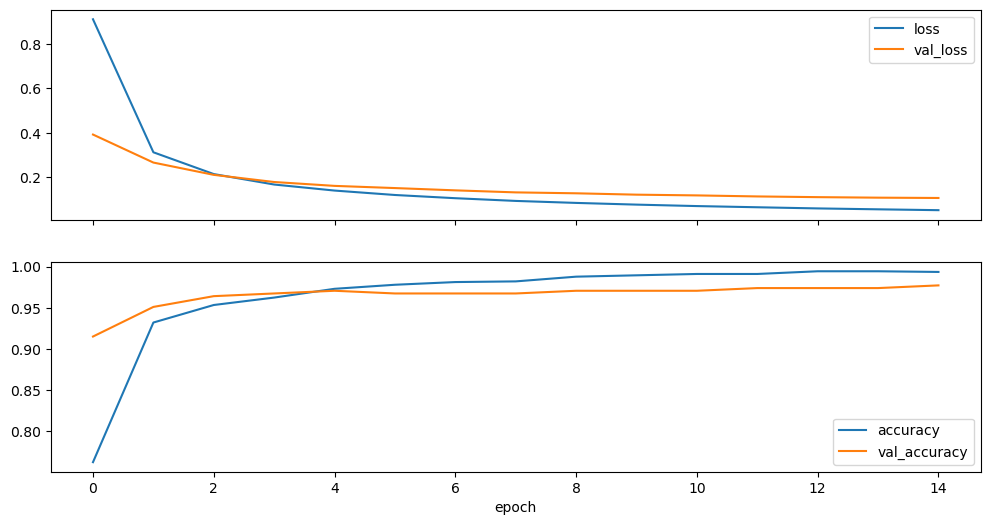

In [56]:
# EPOCH, nombre de fois qu'on parcours le jeu de données. On split en batch, et on refait avec l'ensemble de batch. 
# 1 epoch, on a fini les batch et on recommence jusqu'a 15
# batch fixé par mémoire et par convergence 
# validation split -> pour les metriques

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

input_dim = X_train.shape[1]
hidden_dim = 100
output_dim = Y_train.shape[1]

model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
model.add(Dense(output_dim, activation="softmax"))

model.compile(optimizer=optimizers.SGD(learning_rate=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=15, batch_size=32)

history_df = pd.DataFrame(history.history)
history_df["epoch"] = history.epoch

# ici c'est nous qui regardons la convergence et on l'arrete, et ça prend du temps, 
# donc si on met 100 epochs alors que a 3 il converge ça sert a rien.

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
history_df.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
history_df.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1);

In [57]:
# %load solutions/keras_sgd_and_momentum.py

- Replace the SGD optimizer by the Adam optimizer from keras and run it
  with the default parameters.

  Hint: use `optimizers.<TAB>` to tab-complete the list of implemented optimizers in Keras.

- Add another hidden layer and use the "Rectified Linear Unit" for each
  hidden layer. Can you still train the model with Adam with its default global
  learning rate?

In [ ]:
# %load solutions/keras_adam.py

### Exercises: Forward Pass and Generalization

- Compute predictions on test set using `model.predict(...)`
- Compute average accuracy of the model on the test set: the fraction of test samples for which the model makes a prediction that matches the true label.

In [ ]:
# %load solutions/keras_accuracy_on_test_set.py

Let us decompose how we got the predictions. First, we call the model on the data to get the laster layer (softmax) outputs directly as a tensorflow Tensor:

In [ ]:
predictions_tf = model(X_test)
predictions_tf[:5]

In [ ]:
type(predictions_tf), predictions_tf.shape

We can use the tensorflow API to check that for each row, the probabilities sum to 1:

In [ ]:
import tensorflow as tf

tf.reduce_sum(predictions_tf, axis=1)[:5]

We can also extract the label with the highest probability using the tensorflow API:

In [ ]:
predicted_labels_tf = tf.argmax(predictions_tf, axis=1)
predicted_labels_tf[:5]

We can compare those labels to the expected labels to compute the accuracy with the Tensorflow API. Note however that we need an explicit cast from boolean to floating point values to be able to compute the mean accuracy when using the tensorflow tensors:

In [ ]:
accuracy_tf = tf.reduce_mean(tf.cast(predicted_labels_tf == y_test, tf.float64))
accuracy_tf

Also note that it is possible to convert tensors to numpy array if one prefer to use numpy:

In [ ]:
accuracy_tf.numpy()

In [ ]:
predicted_labels_tf[:5]

In [ ]:
predicted_labels_tf.numpy()[:5]

In [ ]:
(predicted_labels_tf.numpy() == y_test).mean()

## Home Assignment: Impact of Initialization

Let us now study the impact of a bad initialization when training
a deep feed forward network.

By default Keras dense layers use the "Glorot Uniform" initialization
strategy to initialize the weight matrices:

- each weight coefficient is randomly sampled from [-scale, scale]
- scale is proportional to $\frac{1}{\sqrt{n_{in} + n_{out}}}$

This strategy is known to work well to initialize deep neural networks
with "tanh" or "relu" activation functions and then trained with
standard SGD.

To assess the impact of initialization let us plug an alternative init
scheme into a 2 hidden layers networks with "tanh" activations.
For the sake of the example let's use normal distributed weights
with a manually adjustable scale (standard deviation) and see the
impact the scale value:

In [58]:
from tensorflow.keras import initializers

normal_init = initializers.TruncatedNormal(stddev=0.01)


model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh",
                kernel_initializer=normal_init))
model.add(Dense(hidden_dim, activation="tanh",
                kernel_initializer=normal_init))
model.add(Dense(output_dim, activation="softmax",
                kernel_initializer=normal_init))

model.compile(optimizer=optimizers.SGD(learning_rate=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

/Users/pepegarcia/opt/anaconda3/envs/dlclass/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer TruncatedNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [59]:
model.layers

Let's have a look at the parameters of the first layer after initialization but before any training has happened:

In [60]:
model.layers[0].weights

[<tf.Variable 'dense_44/kernel:0' shape=(64, 100) dtype=float32, numpy=
 array([[ 0.01481933, -0.01038546, -0.00826313, ..., -0.00187195,
          0.00123586, -0.00489025],
        [-0.01154655,  0.01664387,  0.00231943, ...,  0.00173561,
         -0.01707027, -0.00415202],
        [ 0.00564451,  0.01681787, -0.01045081, ..., -0.00777208,
         -0.01869288,  0.00487392],
        ...,
        [ 0.01181641, -0.00721002,  0.01022363, ..., -0.01473854,
         -0.00660799, -0.01391911],
        [ 0.00946804,  0.00837885, -0.00380087, ..., -0.01496557,
         -0.0049283 ,  0.01316149],
        [ 0.01294302,  0.00924516,  0.00267534, ...,  0.0024943 ,
          0.00681807,  0.0039414 ]], dtype=float32)>,
 <tf.Variable 'dense_44/bias:0' shape=(100,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [61]:
w = model.layers[0].weights[0].numpy()
w

array([[ 0.01481933, -0.01038546, -0.00826313, ..., -0.00187195,
         0.00123586, -0.00489025],
       [-0.01154655,  0.01664387,  0.00231943, ...,  0.00173561,
        -0.01707027, -0.00415202],
       [ 0.00564451,  0.01681787, -0.01045081, ..., -0.00777208,
        -0.01869288,  0.00487392],
       ...,
       [ 0.01181641, -0.00721002,  0.01022363, ..., -0.01473854,
        -0.00660799, -0.01391911],
       [ 0.00946804,  0.00837885, -0.00380087, ..., -0.01496557,
        -0.0049283 ,  0.01316149],
       [ 0.01294302,  0.00924516,  0.00267534, ...,  0.0024943 ,
         0.00681807,  0.0039414 ]], dtype=float32)

In [62]:
w.std()

0.00881146

In [63]:
b = model.layers[0].weights[1].numpy()
b

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

Epoch 1/15
48/48 [==============================] - 0s 1ms/step - loss: 2.3027 - accuracy: 0.1028
Epoch 2/15
48/48 [==============================] - 0s 919us/step - loss: 2.2996 - accuracy: 0.1087
Epoch 3/15
48/48 [==============================] - 0s 918us/step - loss: 2.2859 - accuracy: 0.1604
Epoch 4/15
48/48 [==============================] - 0s 1ms/step - loss: 2.0480 - accuracy: 0.2292
Epoch 5/15
48/48 [==============================] - 0s 886us/step - loss: 1.5508 - accuracy: 0.4152
Epoch 6/15
48/48 [==============================] - 0s 1ms/step - loss: 0.9338 - accuracy: 0.7223
Epoch 7/15
48/48 [==============================] - 0s 1ms/step - loss: 0.6459 - accuracy: 0.8127
Epoch 8/15
48/48 [==============================] - 0s 967us/step - loss: 0.4873 - accuracy: 0.8605
Epoch 9/15
48/48 [==============================] - 0s 1ms/step - loss: 0.3931 - accuracy: 0.8854
Epoch 10/15
48/48 [==============================] - 0s 1ms/step - loss: 0.3160 - accuracy: 0.9142
Epoch 11/15

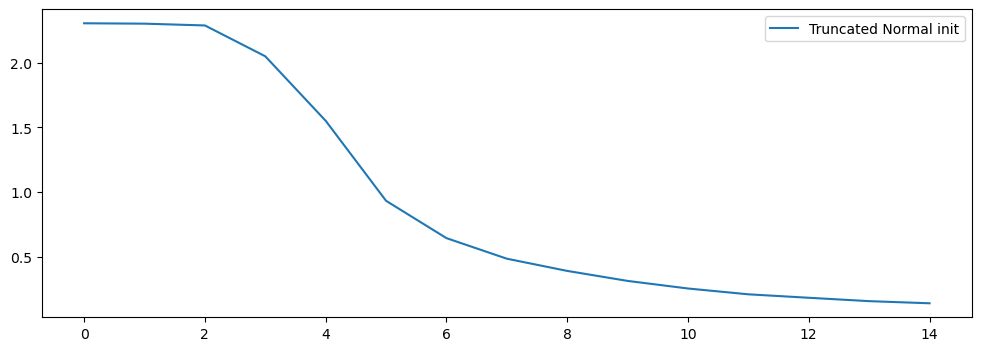

In [64]:
history = model.fit(X_train, Y_train, epochs=15, batch_size=32)

plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label="Truncated Normal init")
plt.legend();

Once the model has been fit, the weights have been updated and notably the biases are no longer 0:

In [65]:
model.layers[0].weights

[<tf.Variable 'dense_44/kernel:0' shape=(64, 100) dtype=float32, numpy=
 array([[ 0.01481933, -0.01038546, -0.00826313, ..., -0.00187195,
          0.00123586, -0.00489025],
        [-0.01634865,  0.01494591, -0.00157891, ...,  0.0222208 ,
         -0.01942283, -0.0040563 ],
        [-0.02531079, -0.00611114, -0.03961009, ...,  0.01875075,
          0.00324655,  0.00671767],
        ...,
        [ 0.09716789,  0.03701298,  0.03284005, ..., -0.07717021,
         -0.08112278, -0.06233737],
        [ 0.06235613,  0.02720984,  0.0050134 , ..., -0.04708096,
         -0.06187857, -0.02429014],
        [ 0.09538977,  0.0512566 ,  0.01301539, ..., -0.08414188,
         -0.03100615, -0.05270467]], dtype=float32)>,
 <tf.Variable 'dense_44/bias:0' shape=(100,) dtype=float32, numpy=
 array([-0.00107529,  0.05598241,  0.02142826, -0.02362352, -0.0245872 ,
        -0.0629698 ,  0.02593534, -0.00878939,  0.04026596, -0.05842018,
         0.03840028,  0.04356781,  0.00746574, -0.00472771, -0.0736169 ,

#### Questions:

- Try the following initialization schemes and see whether
  the SGD algorithm can successfully train the network or
  not:
  
  - a very small e.g. `stddev=1e-3`
  - a larger scale e.g. `stddev=1` or `10`
  - initialize all weights to 0 (constant initialization)
  
- What do you observe? Can you find an explanation for those
  outcomes?

- Are more advanced solvers such as SGD with momentum or Adam able
  to deal better with such bad initializations?

In [66]:
# %load solutions/keras_initializations.py

In [ ]:
# %load solutions/keras_initializations_analysis.py